## <b> Regression Analysis to predict Life Expectancy </b>

In [868]:
#Importing some of the necessary modules to apply multiple linear regression

In [870]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import timeit
path="C:/..../gapminder.csv"
df = pd.read_csv(path)


## Examining the first 5 and the last 5 records of the dataframe

In [871]:
df.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [872]:
df.tail(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa
138,13495462,3.85,15.1,0.654323,22.02660,1286,131.9745,49.0,98.3,Sub-Saharan Africa


In [873]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


## Checking missing values

In [874]:
df.isnull().sum()  # df.isna() to examine by record

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

#### All except Region feature has numeric dataset

## <p>Descriptive Statisticsfor Numeric features of the dataset </p>

In [875]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000



## Exploring categorical feature: Region using 
### 1. frequency distribution   2. Histogram and 3. box plot  of life expectancy by region

In [876]:
#1. Frequency distribution:
grouped_data =df.groupby('Region').count()[['life']]
grouped_data

,life
Region,
America,27
East Asia & Pacific,14
Europe & Central Asia,41
Middle East & North Africa,10
South Asia,7
Sub-Saharan Africa,40


Text(0, 0.5, 'Number of Records')

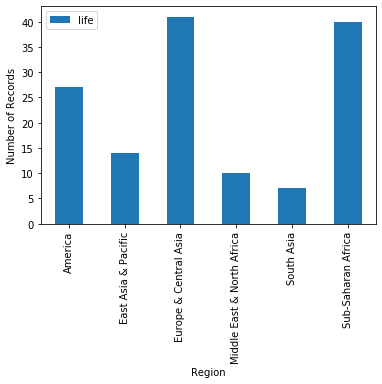

In [877]:
#grouped_data.sort_values('life',inplace=True)
grouped_data.plot(kind='bar')
plt.ylabel('Number of Records')

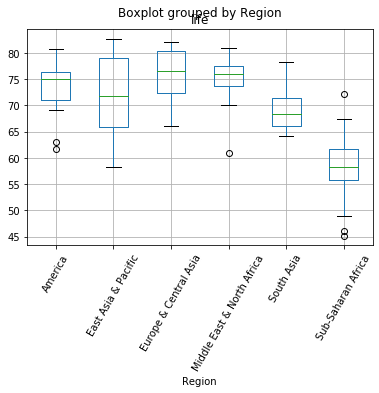

In [878]:
df.boxplot('life',by='Region', rot=60)
plt.show()

#### From the boxplot we can see that Life Expectanc in Sub-Saharan Africa is the lowest followed by South Asia

## Examining the relationship between Life Expectancy and all other numeric feature using correlation matrix, heatmap and scatter plot

### Scatter plot

In [879]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


### heatmap

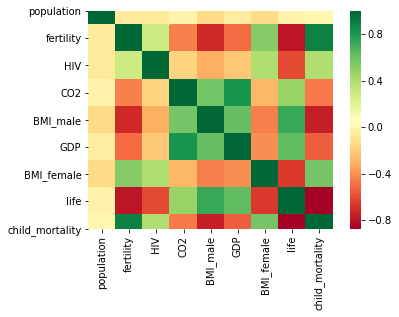

In [880]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

### Scatter plot

In [881]:
df_new = df[['life','population','fertility','HIV','CO2','BMI_male','GDP','BMI_female','child_mortality','Region']]
df_X = df.drop(['life'],axis=1)
df_y = df['life']
print(df_X.columns)
df_X.head(3)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'Region'],
      dtype='object')


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,15.4,America


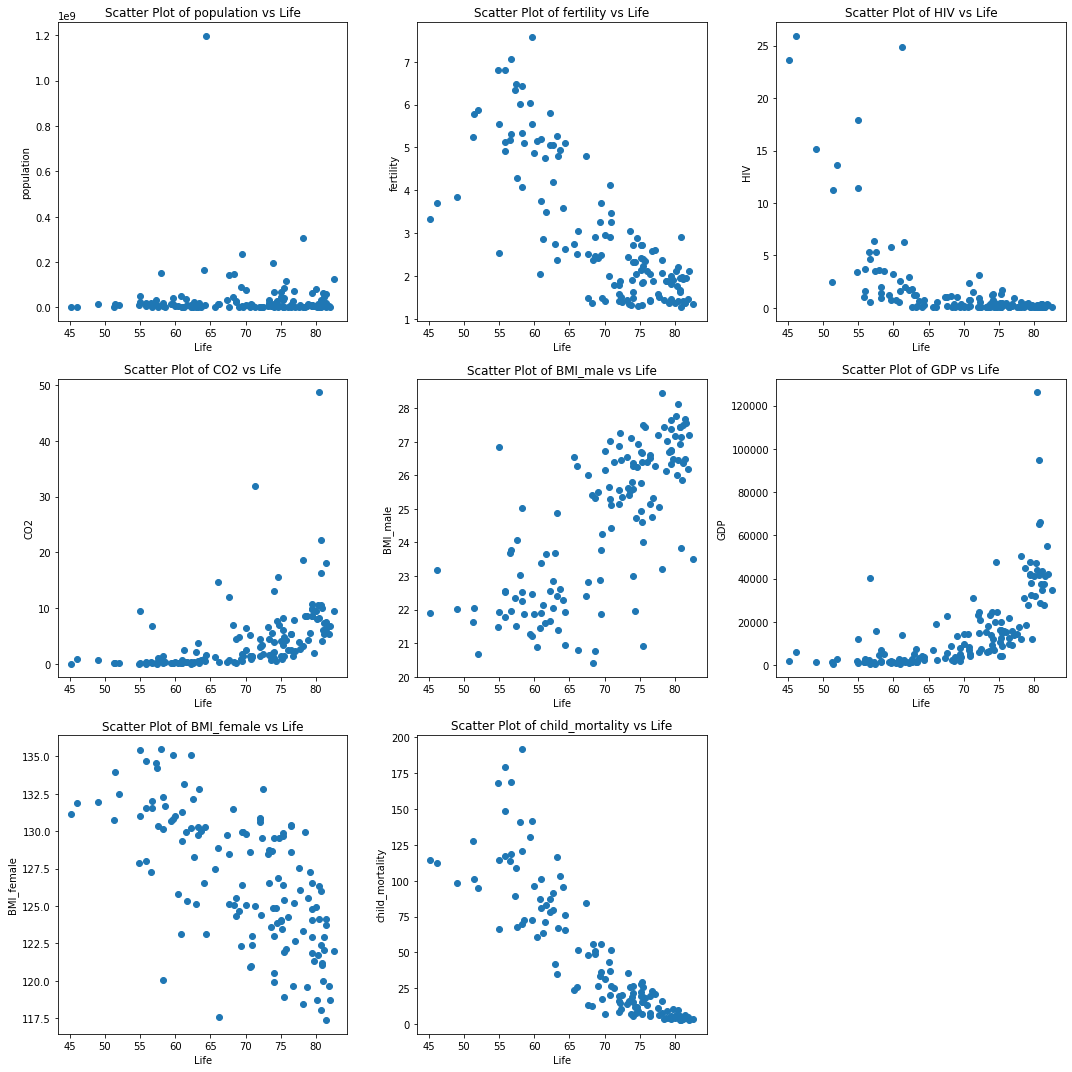

In [882]:
# Create subplots with three scatter plots per row
n_cols = 3
n_rows = int(np.ceil(df_X.shape[1] / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the subplot array to make indexing easier
axs = axs.flatten()

# Plot scatter plots of all numeric variables against life Expectancy
for i, column in enumerate(df_X.columns[:-1]):
    axs[i].scatter(df['life'], df_X[column])
    axs[i].set_xlabel('Life')
    axs[i].set_ylabel(column)
    axs[i].set_title("Scatter Plot of {} vs {}".format(column, 'Life'))

# Remove extra subplots that were created in case the number of variables is not divisible by 2
for i in range(i+1, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


 ## The Scatter Plot and correlation matrix  shows : 
 <p><b> 1. There is a strong Negative correlation between Life Expectancy and [Child Mortality, Fertility,BMI_female index and HIV]</b></p>
 <p> <b>2. There is a positive correlation between Life Expectancy and [Co2,GDP and BMI_male index]</b> </p>
    

In [885]:
df.corr()['life'].sort_values()

child_mortality   -0.874106
fertility         -0.786921
BMI_female        -0.658718
HIV               -0.604749
population        -0.005051
CO2                0.476666
GDP                0.628999
BMI_male           0.731559
life               1.000000
Name: life, dtype: float64

## Fitting Regression & predict based on the model 
fit a linear regression and predict life expectancy using just one feature - 'fertility'.  The goal is to predict life expectancy, 

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. 
As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. 
Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the  score using scikit-learn's .score() method.


### Preparing the dataset for regression Analysis:
1. Transform categorial variable Region into numeric variable using pandas get_dummies method

In [886]:
'''df_new = df[['life','population','fertility','HIV','CO2','BMI_male','GDP','BMI_female','child_mortality']]
df_X = df.drop(columns=['life'])
df_y = df['life']
df_X.columns[:-1]'''
# Creating dummy variables: 
df_New = pd.get_dummies(df)

print(df_New.columns)

# Creating dummy variables with drop_first
df_New = pd.get_dummies(df,drop_first=True)

# Checking the first dummy
print(df_New.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [887]:
df_New.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,0,0,1,0,0
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,0,0,0,0,1
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,0,0,0,0,0
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,0,1,0,0,0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,1,0,0,0,0


## Separating, Creating arrays for features and target variables, Reshaping to sickitlearn standard for model building

In [888]:
df_lessLife = df_New.drop(['life'],axis=1) #df_New.drop(columns=['life'])
df_resp = df['life']
X = df_lessLife.values
y = df_resp.values
X.shape , y.shape
df_lessLife.head(3)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5,0,0,1,0,0
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,192.0,0,0,0,0,1
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,15.4,0,0,0,0,0


In [889]:
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(X.shape))
print("Dimensions of X after reshaping: {}".format(y.shape))


Dimensions of y after reshaping: (139, 13)
Dimensions of X after reshaping: (139,)


###  Assumptions of regression 
1. Linearity: Plot the scatter plot of the dependent variable against each independent variable to check for linearity.
2. Independence: Ensure that there is no autocorrelation in the residuals. You can plot the residuals against the time index and check for any patterns.
3. Normality: Check for normality of the residuals using a histogram or a normal probability plot. The residuals should be approximately normally distributed.
4. Homoscedasticity: Check for homoscedasticity of the residuals using a scatter plot of residuals against the fitted values. The residuals should have constant variance across the range of fitted values.
5. No multicollinearity: Check for multicollinearity among the independent variables. A high correlation among the independent variables can cause problems in the estimation of the regression coefficients. You can use the variance inflation factor (VIF) to check for multicollinearity.
   

#### Assumption2: Test of Indepence (plotting residuals vs time)

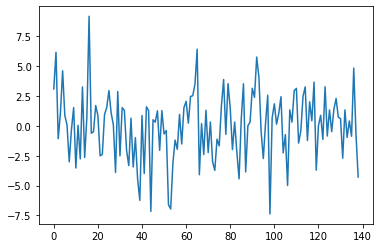

In [890]:
plt.plot(residuals)

#### Assumption3 : Normality of Residual

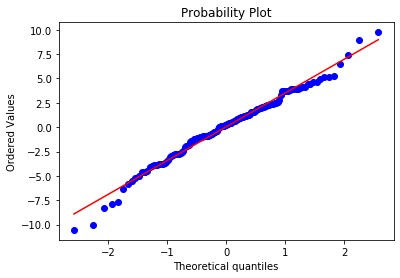

In [891]:
import statsmodels.api as sm
from scipy  import stats

# fit the linear regression model
model = sm.OLS(y, X).fit()



# check the normality assumption
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

#### Assumption 4: Verifying Equal Variance assumption for the residuals

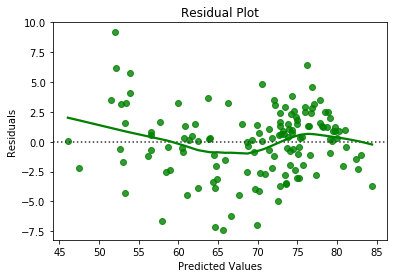

In [832]:
# Fit a linear regression model
reg = LinearRegression().fit(X, y)

# Predict the target variable
y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
sns.residplot(y_pred, residuals, lowess=True, color="g")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


#### Assumption 5: Verifying Multicollinearity among dependent varaibles(features)

In [892]:
# calculate the VIF for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lessLife.values, i) for i in range(df_lessLife.shape[1])]
vif["features"] = df_lessLife.columns
vif.round(1)

,VIF Factor,features
0,1.3,population
1,38.3,fertility
2,2.0,HIV
3,5.0,CO2
4,440.4,BMI_male
5,7.5,GDP
6,528.1,BMI_female
7,14.2,child_mortality
8,1.8,Region_East Asia & Pacific
9,3.6,Region_Europe & Central Asia


### The  above VIF result and the correlation matrix suggests that there is Multilcollinearity between dependent features: Standardize (VIF > 10 => there is multicollinearity)

In [893]:
df_new = df[['life','population','fertility','HIV','CO2','BMI_male','GDP','BMI_female','child_mortality','Region']]
df_X = df.drop(['Region'],axis=1)
df_y = df['life']

print(df_X.columns)
df_X.head(3)
print(df_X.values.shape, df_y.values.shape)

X = df_X.values
y = df_y.values

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# The scaled data
print(X_scaled)
df1 = pd.DataFrame(X_scaled,columns=df_X.columns)
df1['Region']=df.Region
'''life_ = list(df.life.values)
df1.insert(loc = 0,
          column = 'life',
          value = life_)'''

df1.head(3)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'],
      dtype='object')
(139, 9) (139,)
[[-0.00631163 -0.17092402 -0.41328844 ...  0.718822    0.62679326
  -0.34234326]
 [-0.14349234  2.1278789   0.01920939 ...  0.76815006 -1.24353439
   3.22439029]
 [ 0.04474163 -0.47536008 -0.32223626 ... -1.75283262  0.64879711
  -0.65182598]
 ...
 [ 0.46820725 -0.71145336 -0.34499931 ... -1.06942126  0.63779518
  -0.41477539]
 [-0.20514768  1.78616495  2.65972244 ...  1.28984257 -1.93665581
   1.09312981]
 [-0.2016571   0.52492984  3.00116809 ...  1.18328677 -2.26671363
   1.16775685]]


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,0.626793,-0.342343,Middle East & North Africa
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,-1.243534,3.224390,Sub-Saharan Africa
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,0.648797,-0.651826,America


In [894]:
# Creating dummy variables: 
df_New2 = pd.get_dummies(df1)


# Creating dummy variables with drop_first
df_New2 = pd.get_dummies(df1,drop_first=True)

# Checking the first dummy
print(df_New2.columns)
df_New2.head(3)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,0.626793,-0.342343,0,0,1,0,0
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,-1.243534,3.224390,0,0,0,0,1
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,0.648797,-0.651826,0,0,0,0,0


In [895]:
df_lessLife = df_New2.drop(['life'],axis=1) #df_New.drop(columns=['life'])
df_resp = df_New2['life']
X = df_lessLife.values
y = df_resp.values
X.shape , y.shape
df_lessLife.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,-0.342343,0,0,1,0,0
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,3.224390,0,0,0,0,1
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,-0.651826,0,0,0,0,0


In [896]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lessLife.values, i) for i in range(df_lessLife.shape[1])]
vif["features"] = df_lessLife.columns
vif.round(1)

,VIF Factor,features
0,1.2,population
1,9.0,fertility
2,1.7,HIV
3,3.5,CO2
4,4.5,BMI_male
5,4.0,GDP
6,2.4,BMI_female
7,7.1,child_mortality
8,1.5,Region_East Asia & Pacific
9,2.3,Region_Europe & Central Asia


#### The result improved and shows that The VIF < 10

### Fitting regression on the whole dataset and Examining the model using goodness of fit test (R-Square)

In [897]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# predictions over the prediction space: 
life_pred = reg.predict(X)
reg.score(X,y) ## R-Square
reg.score(X,y), reg.coef_

(0.905239828752503,
 array([-0.0254972 , -0.16728313, -0.30945806, -0.14443591,  0.03406254,
         0.29409779, -0.16640761, -0.44805215, -0.28821896, -0.04843107,
         0.13844309, -0.03022889,  0.12536659]))

### Cross-validation: 

<b>Cross-validation</b> is a technique used in machine learning to evaluate the performance of a model. It involves dividing the dataset into training and testing sets, and using the training data to train the model and the testing data to evaluate its performance. The process is repeated multiple times, each time with a different subset of the data being used for testing, and the average performance across all iterations is used to evaluate the model's generalization performance. This approach helps to avoid overfitting, where a model performs well on the training data but poorly on new, unseen data.

In [898]:
# k = 5 cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=5)

print(cv_scores)

print("Average of 5 CV Score: {}".format(np.mean(cv_scores)))

[0.8196741  0.80301541 0.89758712 0.80425614 0.94015848]
Average of 5 CV Score: 0.8529382494225004


#### Testing the model with different level (K) of cross-validation

In [899]:
# 5-fold cross-validation scores: cv_scores
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 6-fold CV
cvscores_6 =  cross_val_score(reg,X,y,cv=6)
print(np.mean(cvscores_6))

# Perform 10-fold CV
cvscores_10 =  cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.8588147957934277
0.8571640534827982
0.8383419216153442


# Train/test split for Linear regression

In [900]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3 , random_state=42)

# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
regress = reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = regress.predict(X_test)


### Goodness of Fit test using R-Square and Root mean square error (RMSE) for the linear regression

In [901]:
# Compute and print R^2 and RMSE
'''R-Square is a commonly used metric to evaluate the goodness of fit of the linear regression.
(it is good when there are a large number of independent variables)'''
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8219419939568102
Root Mean Squared Error: 0.3746429228871234


## Introducing Ridge  and Lasso regression

## Regularization: Lasso (L1) and Ridge (L2) Regularizations
L1 and L2 regularization are two common techniques used to add a penalty term to the loss function in order to prevent
overfitting. L1 regularization, also known as Lasso regularization, adds a penalty term to the loss function that is 
proportional to the absolute value of the model's weights. The effect of L1 regularization is to shrink some of the 
model's weights to exactly zero, which can be useful for feature selection.

L2 regularization, also known as  Ridge regularization, adds a penalty term to the loss function that is proportional 
to the square of the model's weights. The effect of L2 regularization is to shrink the model's weights towards zero, 
but it does not force them to exactly zero. L2 regularization is often used when we want to keep all the features but
reduce the magnitude of the weights. In general, L1 regularization is used when we want to have a sparse model 
(i.e. a model with few non-zero coefficients), while L2 is used when we want to have a dense model
(i.e. a model with many non-zero coefficients) with small values.



<p>The L1 regularization term is added to the loss function as an absolute value of the weights multiplied by a 
regularization parameter lambda. The new loss function with L1 regularization looks like this:</p>

## Loss function with L1 regularization = Original loss function + lambda * sum(abs(weights))

The L2 regularization term is added to the loss function as a square of the weights multiplied by a regularization 
parameter lambda. The new loss function with L2 regularization looks like this:

## Loss function with L2 regularization = Original loss function + lambda * sum(weights^2)

Where:

Original loss function is the loss function that the model is trying to optimize, such as mean squared error for linear regression or cross-entropy for classification.
lambda is the regularization parameter, a scalar value that controls the strength of the regularization. A larger lambda value results in stronger regularization and smaller model weights.
weights are the model parameters that are being regularized.
In both formulas, the sum is taken over all the weights in the model, and lambda is a scalar value that controls the strength of the regularization. A larger lambda value results in stronger regularization and smaller model weights.


### Fitting Lasso Regression model

[-0.         -0.         -0.0207522   0.          0.          0.
 -0.         -0.46591082  0.          0.          0.          0.
 -0.        ]
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


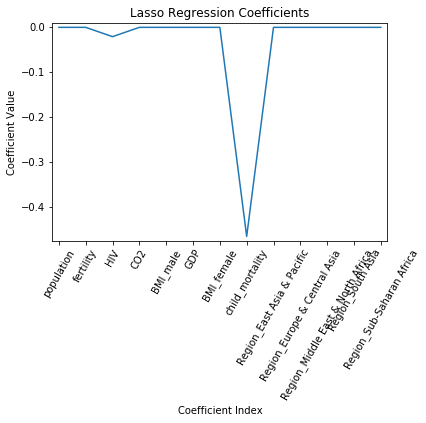

In [902]:
from sklearn.linear_model import Lasso

# Fit a Lasso regression model
lasso = Lasso(alpha=0.4).fit(X, y)

# Plot the coefficients
plt.plot(np.arange(X.shape[1]), lasso.coef_)
plt.xticks(range(X.shape[1]), df_lessLife.columns, rotation=60)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Coefficients")
plt.margins(.02)
print(lasso.coef_)
print(df_lessLife.columns)
plt.show()

In [903]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

Lasso is great for feature selection, but when building regression models, Ridge regression should be the first choice.

lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1  regularization because the regularization term is the L1 norm of the coefficients. 

The correct way is to take the sum of the squared values of the coefficients multiplied by some alpha - L2 Regualarization or ridge regression 

## Goodness of Fit test for Lasso Regression Method

In [904]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3 , random_state=42)

# Create the regressor: reg_all
lasso = Lasso()
lasso_reg = lasso.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)

#  R^2 and RMSE
'''R-Square is a commonly used metric to evaluate the goodness of fit of the linear regression.
(it is good when there are a large number of independent variables)'''
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.02674268929631296
Root Mean Squared Error: 0.8996375824527082


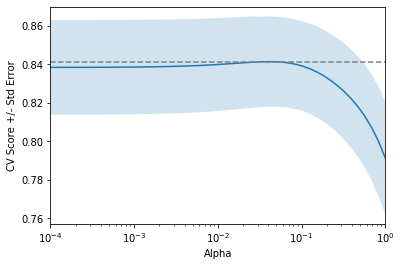

In [905]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []


ridge = Ridge(normalize=True)

# scores over range of alphas
for alpha in alpha_space:
    ridge.alpha = alpha 
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)


### Fitting Ridge regression model

In [906]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=0.5,normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = ridge.fit(X,y)
# Print the cross-validated scores
print(cross_val_score(ridge,X,y,cv=5))
print(np.mean(cross_val_score(ridge,X,y,cv=5)))

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]
0.832966471973914


#### Train/ Test Split

In [907]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3 , random_state=42)
ridge = Ridge(alpha=0.5,normalize=True)


# Fit the regressor to the training data
ridge_regress = ridge.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = ridge_regress.predict(X_test)
print(cross_val_score(ridge,X_test,y_test,cv=5))
print(np.mean(cross_val_score(ridge,X_test,y_test,cv=5)))


#  R^2 and RMSE
'''R-Square is a commonly used metric to evaluate the goodness of fit of the linear regression.
(it is good when there are a large number of independent variables)'''
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print(ridge.coef_)

[0.67494598 0.95127433 0.84642825 0.70046794 0.90302881]
0.815229062397451
R^2: 0.8345330688759484
Root Mean Squared Error: 0.3611539642690085
[-0.02488955 -0.11387952 -0.23230379  0.01470393  0.10679549  0.17957504
 -0.15125829 -0.21351808 -0.16205036  0.1337988   0.14581146  0.02669958
 -0.26994536]


   ## Almost all the three Models can predict correct the life expectancy based on the given features at least 81% of the time 